# Data Visualizations with Python
A variety of data visualizations in Python using Seaborn and a few other packages 

#### Base Imports

In [1]:
# for data analysis 
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import missingno as msno # to plot missing data
import seaborn as sns

#### Set Options

In [2]:
# display up to 999 rows and columns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
# visualization options
%matplotlib inline
sns.set() # use seaborn defaults
sns.set_style("whitegrid")

#### Load & Explore Data

In [4]:
# Data source: https://www.kaggle.com/mauryashubham/english-premier-league-players-dataset
df_raw = pd.read_csv('epldata_final.csv', low_memory=False)

In [5]:
df = df_raw.copy()
df = df.drop('fpl_sel', axis=1)

# Let's add another data column:
df.loc[df['position_cat'] == 4, 'position_cat_name'] = "Goalkeeper"
df.loc[df['position_cat'] == 3, 'position_cat_name'] = "Defense"
df.loc[df['position_cat'] == 2, 'position_cat_name'] = "Midfield"
df.loc[df['position_cat'] == 1, 'position_cat_name'] = "Attack"

# A convert object types to categories
catg_cols = ['name', 'club', 'position', 'nationality', 'position_cat_name']
df.loc[:, catg_cols] = df.loc[:, catg_cols].apply(lambda x: x.astype('category'))

display(df.shape)
display(df.head())
display(df.tail())
display(df.describe())

(461, 17)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,position_cat_name
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,264,3.0,Chile,0,4,1,1,0,Attack
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,167,2.0,Germany,0,4,1,1,0,Attack
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,134,2.0,Czech Republic,0,6,1,1,0,Goalkeeper
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,122,1.0,England,0,4,1,1,0,Attack
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,121,2.0,France,0,4,1,1,0,Defense


,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,position_cat_name
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,38,2.0,Switzerland,0,1,20,0,1,Midfield
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,34,4.0,Congo DR,0,2,20,0,1,Defense
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,29,1.0,England,0,2,20,0,0,Defense
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,16,1.0,England,0,1,20,0,1,Attack
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,12,4.0,Senegal,0,3,20,0,0,Attack


,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


#### Missing Data
https://github.com/ResidentMario/missingno

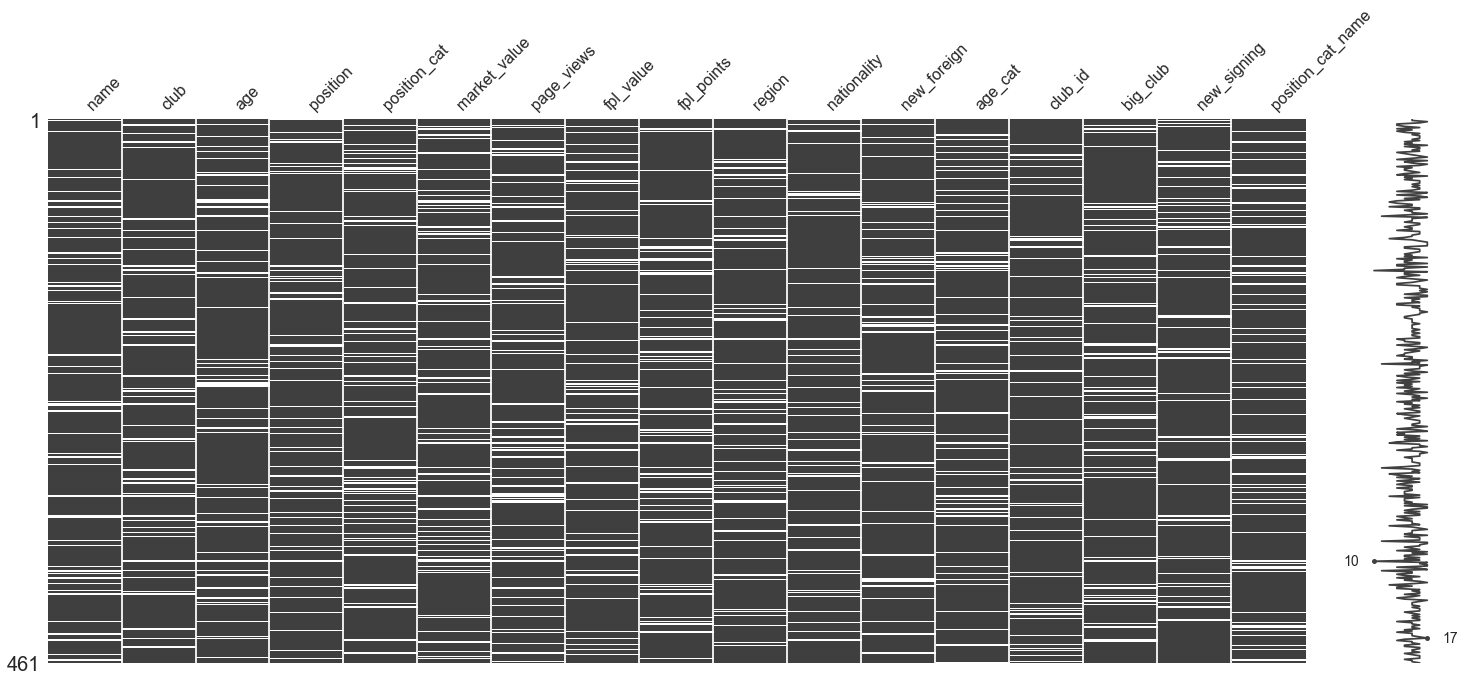

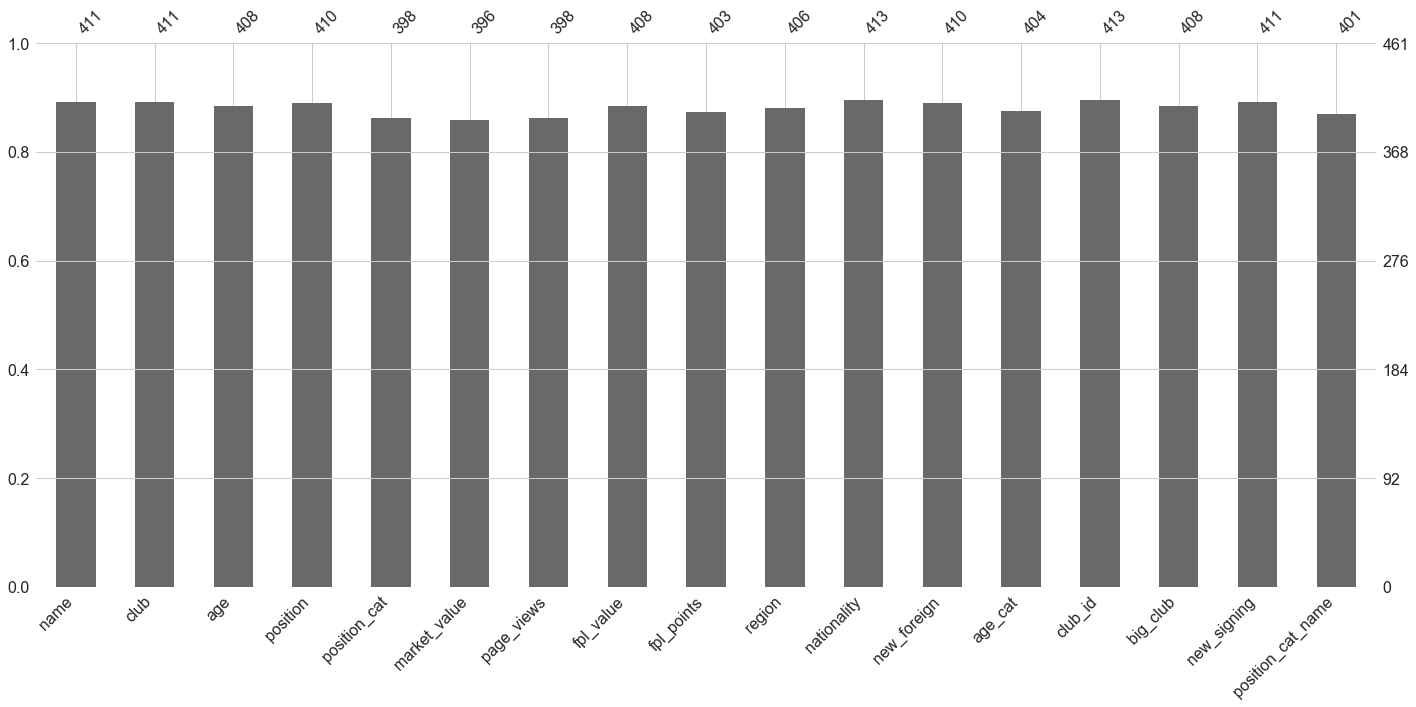

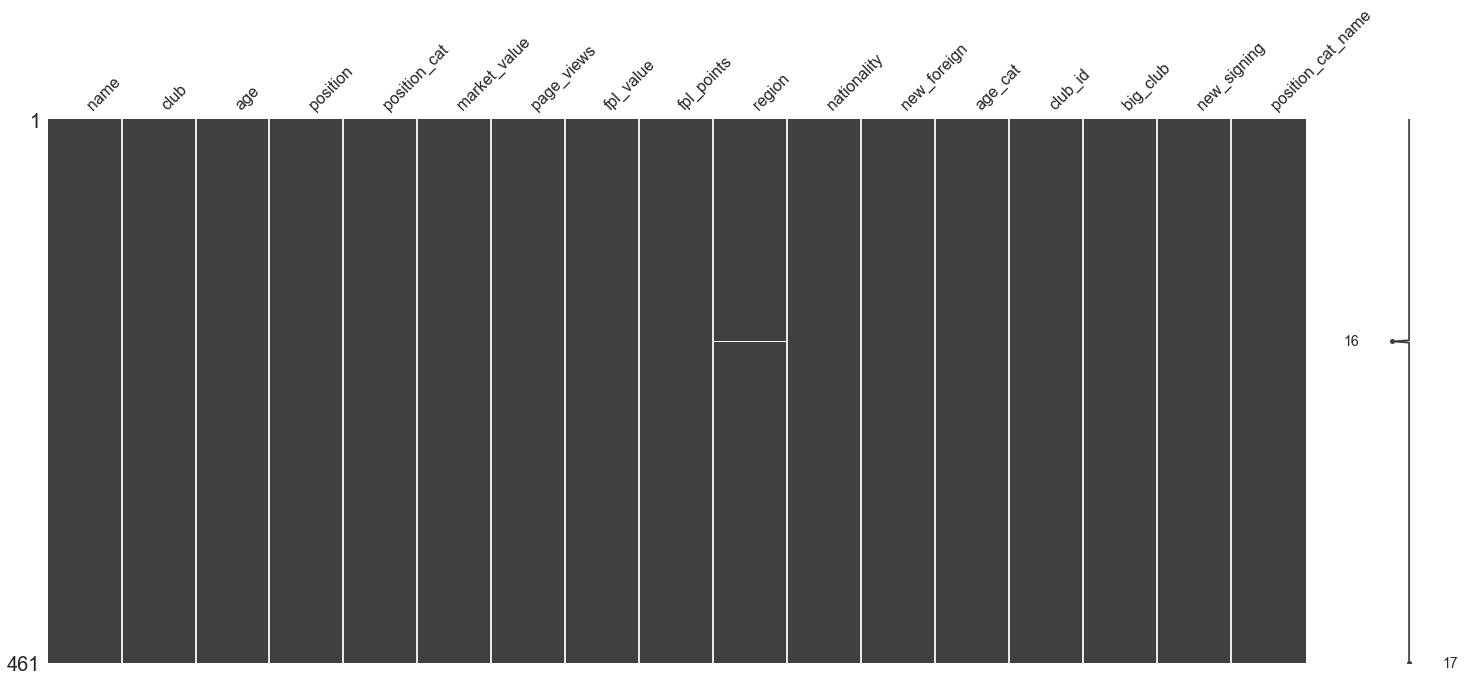

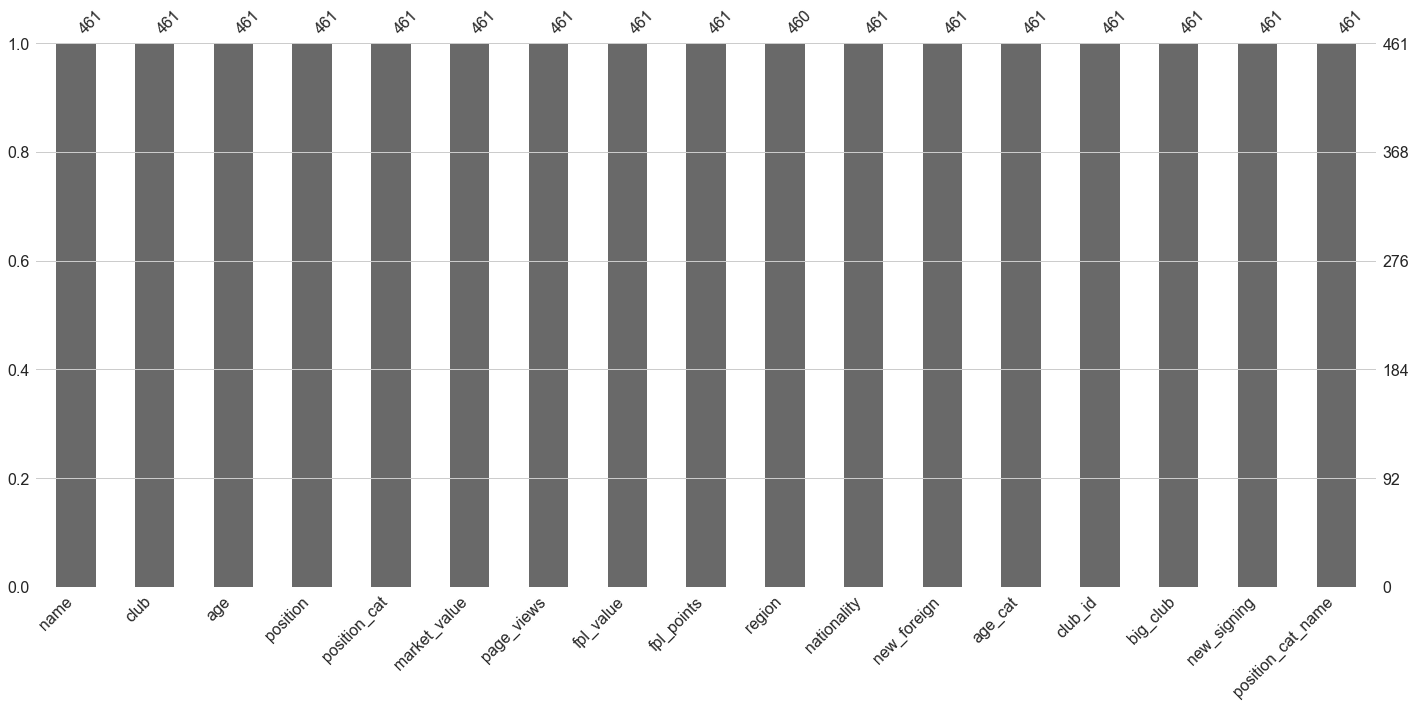

In [6]:
# create some fake missing data
rand_rows = np.random.randint(0, len(df), 1000)
rand_cols = np.random.randint(0, len(df.columns), 1000)
missing_df = df.copy()
missing_df.loc[:, missing_df.columns] = missing_df.loc[:, missing_df.columns].apply(lambda x: x.astype('str'))
for i,j in zip(rand_rows,rand_cols): 
    missing_df.iat[i,j] = np.nan

# visualize fake missing data
msno.matrix(missing_df)
msno.bar(missing_df)

# visualize real dataset
msno.matrix(df)
msno.bar(df)

df.region = df.region.fillna(0) # fill in our single missing value as 0

# Quantitative Data

## Continuous Data

### Univariate

#### Histogram (w/ Density Curve and Rug Plot)
https://seaborn.pydata.org/generated/seaborn.distplot.html

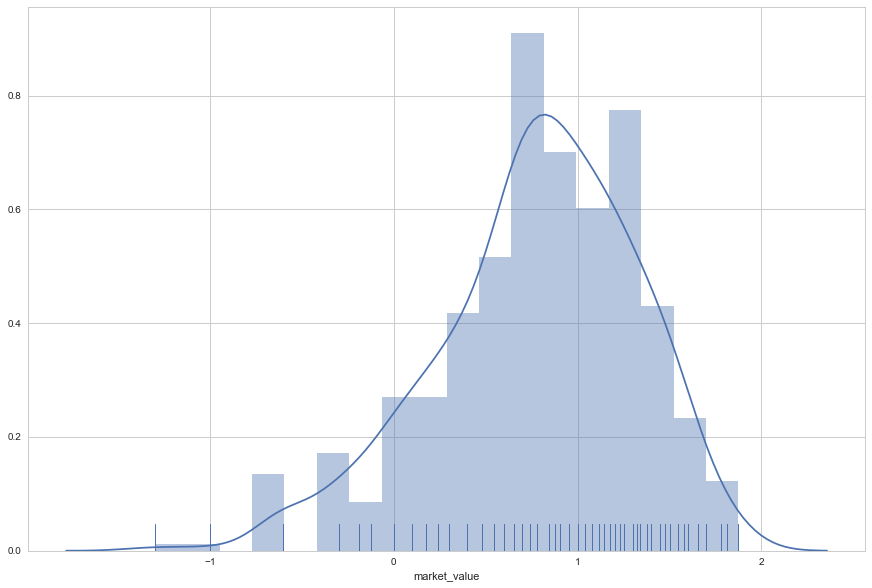

In [7]:
# Set figure size
plt.figure(figsize=(15,10))

# x on log10 scale
ax = sns.distplot(np.log10(df.market_value), rug=True) # set kde=False to remove density curve

#### Box Plot
https://seaborn.pydata.org/generated/seaborn.boxplot.html

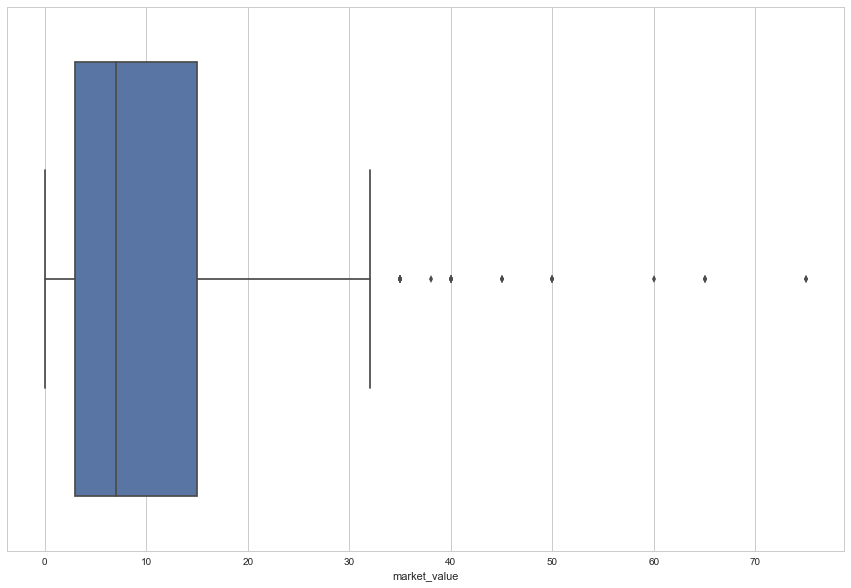

In [8]:
# Set figure size
plt.figure(figsize=(15,10))

ax = sns.boxplot(x=df.market_value)

#### Violin Plot
https://seaborn.pydata.org/generated/seaborn.violinplot.html

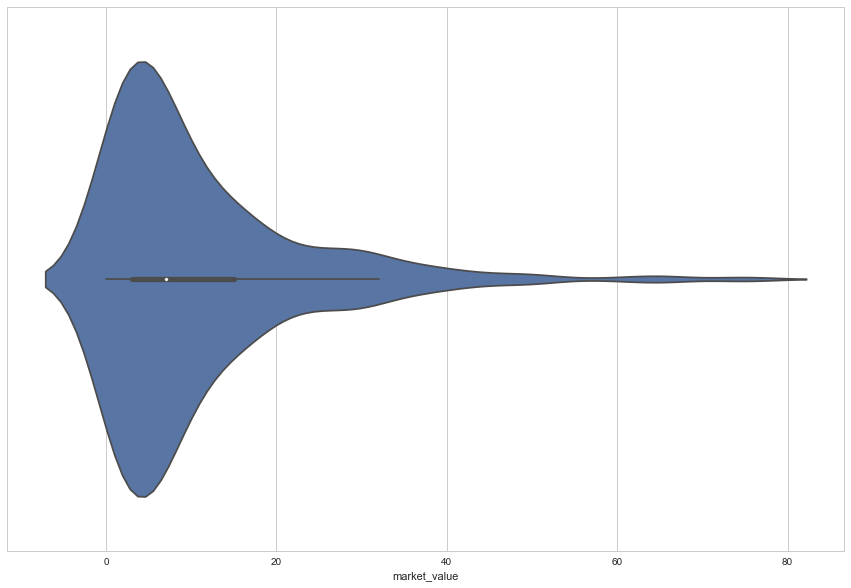

In [9]:
# Set figure size
plt.figure(figsize=(15,10))

ax = sns.violinplot(x=df.market_value)

### Bivariate

#### Scatter Plot
https://seaborn.pydata.org/generated/seaborn.regplot.html

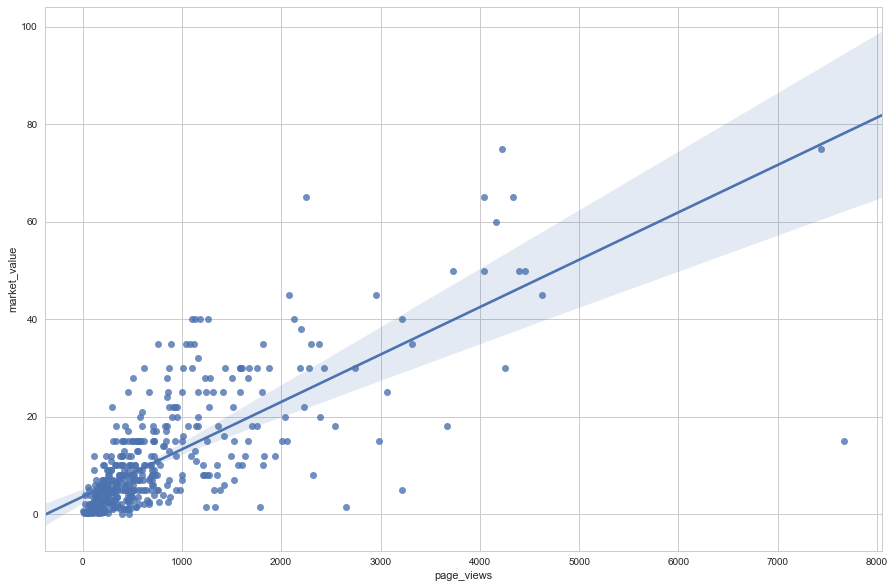

In [10]:
# Set figure size
plt.figure(figsize=(15,10))

ax = sns.regplot(x="page_views", y="market_value", data=df)

#### Hex Plot w/ Histograms
https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot

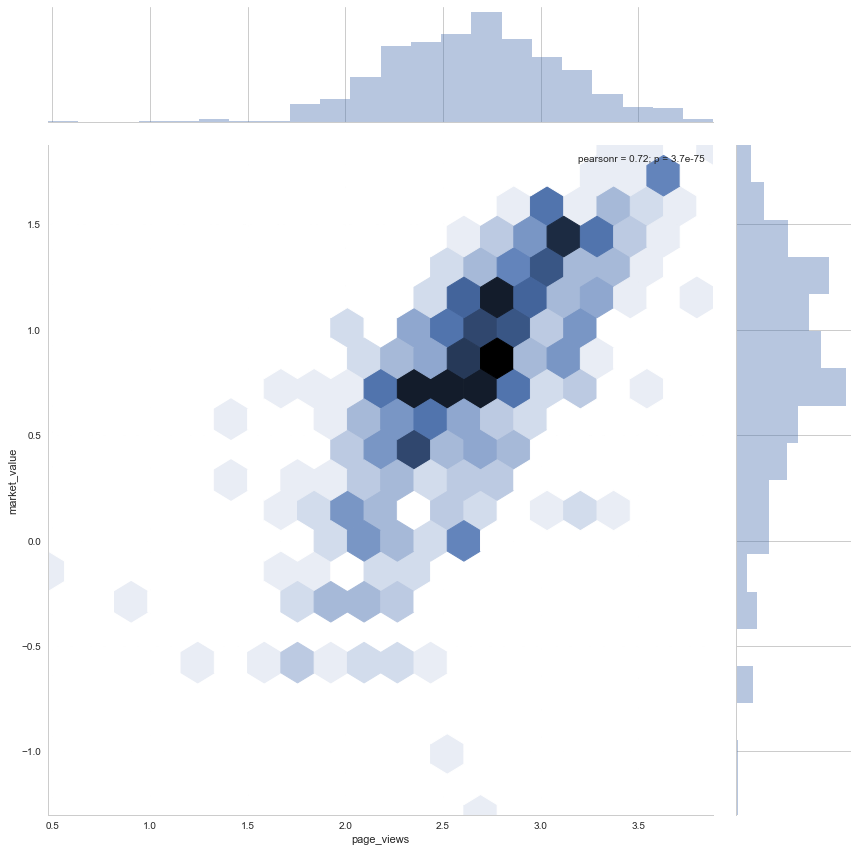

In [11]:
# both x and y on log10 scale
g = sns.jointplot(x=np.log10(df.page_views), y=np.log10(df.market_value), kind="hex", size=12)

#### Kernel Density Plot
https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot

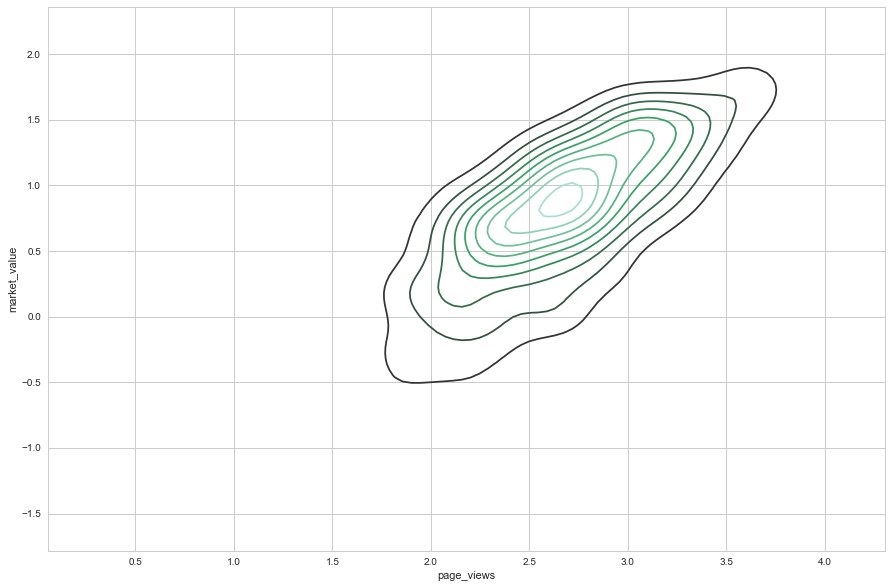

In [12]:
# Set figure size
plt.figure(figsize=(15,10))

# both x and y on log10 scale
ax = sns.kdeplot(np.log10(df.page_views), np.log10(df.market_value))

### Multivariate

#### Parallel Coordinate Plot
https://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates

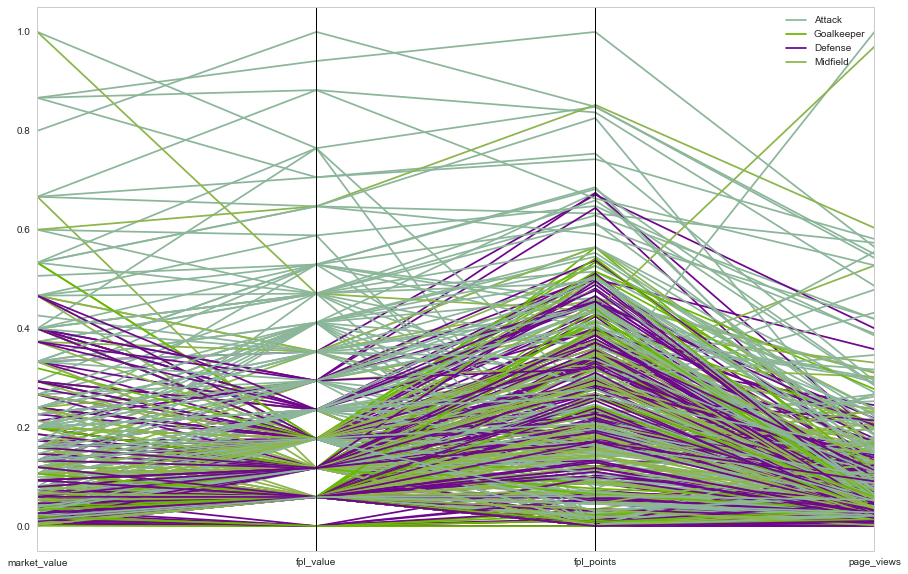

In [13]:
# Set figure size
plt.figure(figsize=(15,10))

# Need some additional imports
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # for scaling data

# Get numerical data columns we want to plot
cols = ['market_value','fpl_value', 'fpl_points', 'page_views']
pcp_df = pd.DataFrame(scaler.fit_transform(df.loc[: , cols]),columns = cols)
pcp_df['position_cat_name'] = df.position_cat_name

parallel_coordinates(pcp_df, 'position_cat_name')

#### Scatterplot Matrix
https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

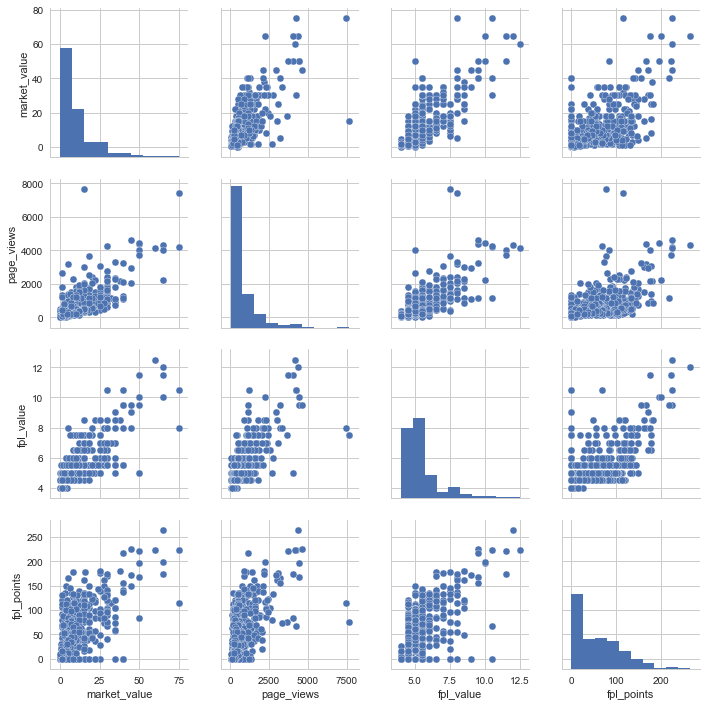

In [14]:
# Set figure size
plt.figure(figsize=(15,10))

# Get numerical data columns we want to plot
cols = ['market_value', 'page_views', 'fpl_value', 'fpl_points']
splom_df = df.loc[: , cols]

g = sns.pairplot(splom_df)

## Discrete Data 

### Univariate

#### Bar Chart
https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot

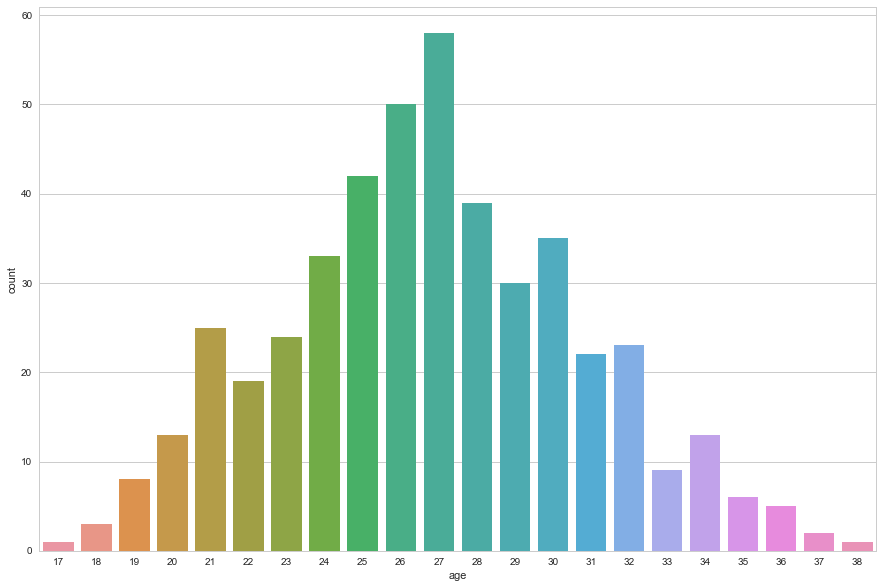

In [15]:
# Set figure size
plt.figure(figsize=(15,10))

ax = sns.countplot(x="age", data=df) # use x="column" for vertical plot

### Bivariate

#### Bar Chart
https://seaborn.pydata.org/generated/seaborn.barplot.html

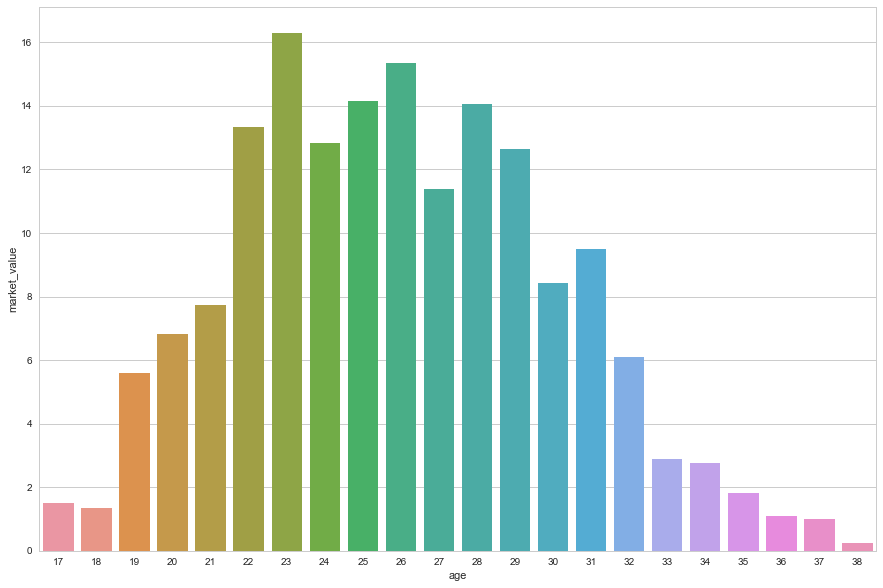

In [16]:
# Set figure size
plt.figure(figsize=(15,10))

ax = sns.barplot(x="age", y="market_value", data=df, ci=None) # ci=None removes error bars

#### Scatter Plot
https://seaborn.pydata.org/generated/seaborn.stripplot.html

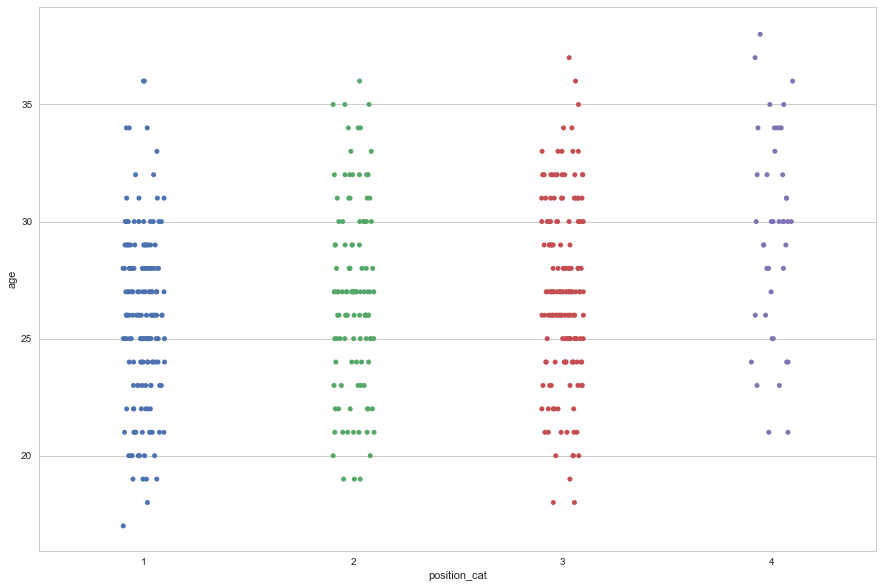

In [17]:
# Set figure size
plt.figure(figsize=(15,10))

ax = sns.stripplot(x="position_cat", y="age", data=df, jitter=True)

### Multivariate

#### Parallel Coordinate Plot
https://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates

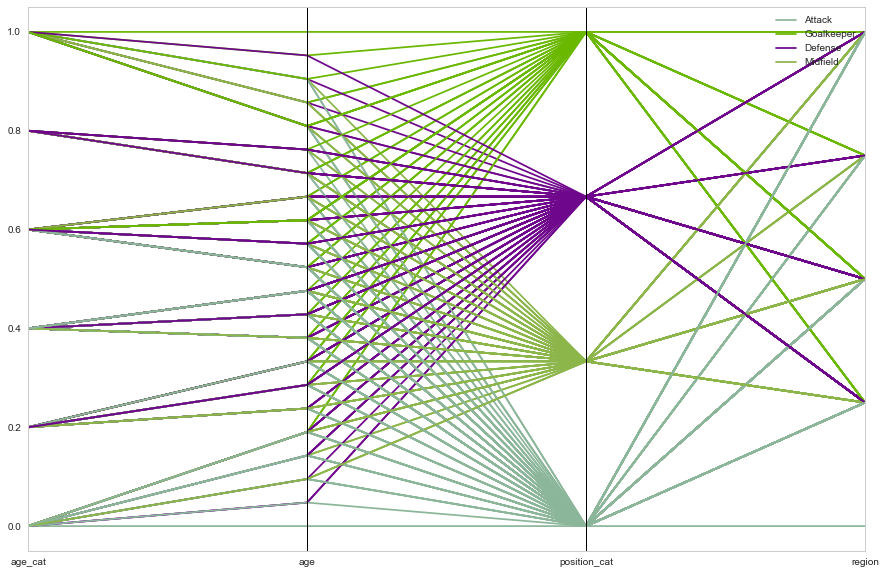

In [18]:
# Set figure size
plt.figure(figsize=(15,10))

# Need some additional imports
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # for scaling data

# Get numerical data columns we want to plot
cols = ['age_cat', 'age', 'position_cat', 'region']
pcp_df = pd.DataFrame(scaler.fit_transform(df.loc[: , cols]),columns = cols)
pcp_df['position_cat_name'] = df.position_cat_name

parallel_coordinates(pcp_df, 'position_cat_name')

# Categorical Data

## Nominal Data

### Univariate

#### Horizontal Bar Chart
https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot

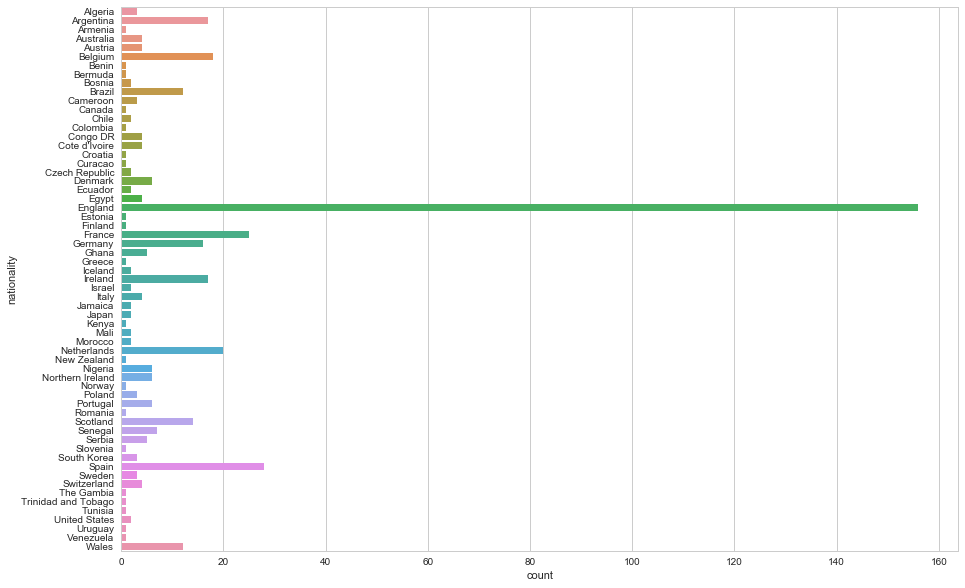

In [19]:
# Set figure size
plt.figure(figsize=(15,10))

ax = sns.countplot(y="nationality", data=df) # use y="column" for horizontal plot

### Bivariate

#### Bar Chart
https://seaborn.pydata.org/generated/seaborn.barplot.html

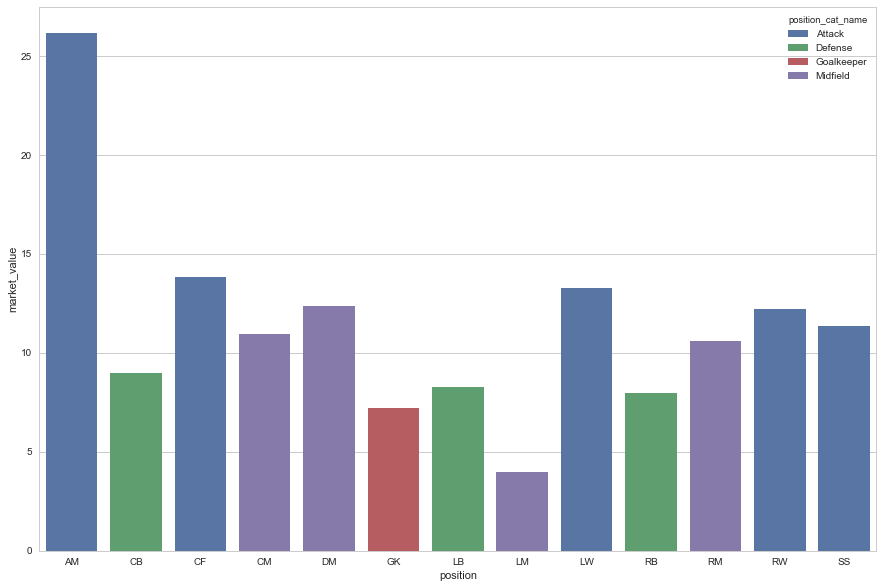

In [20]:
# Set figure size
plt.figure(figsize=(15,10))

ax = sns.barplot(x="position", y="market_value", hue="position_cat_name", dodge=False, data=df, ci=None) # ci=None removes error bars

#### Grouped Box Plots
https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

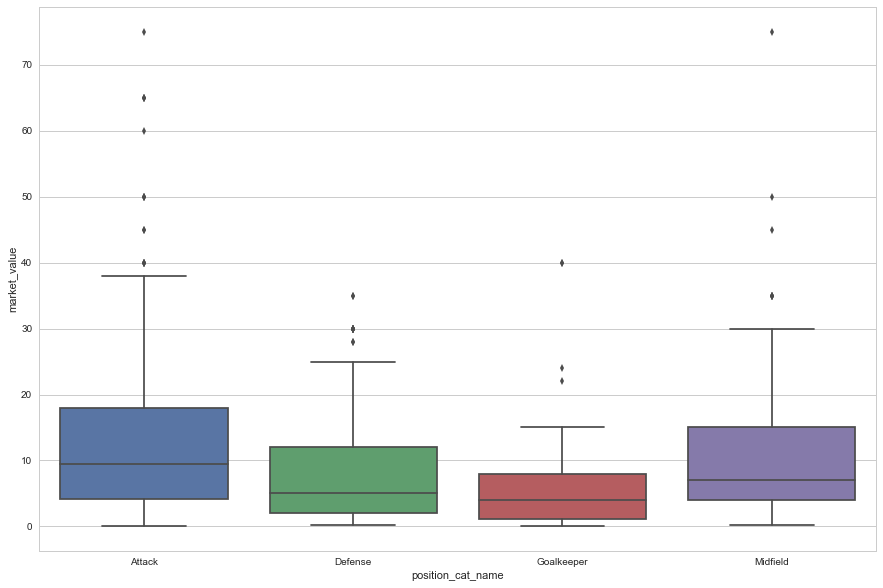

In [21]:
# Set figure size
plt.figure(figsize=(15,10))

ax = sns.boxplot(x="position_cat_name", y="market_value", data=df)

#### Grouped Violin Plots
https://seaborn.pydata.org/generated/seaborn.violinplot.html

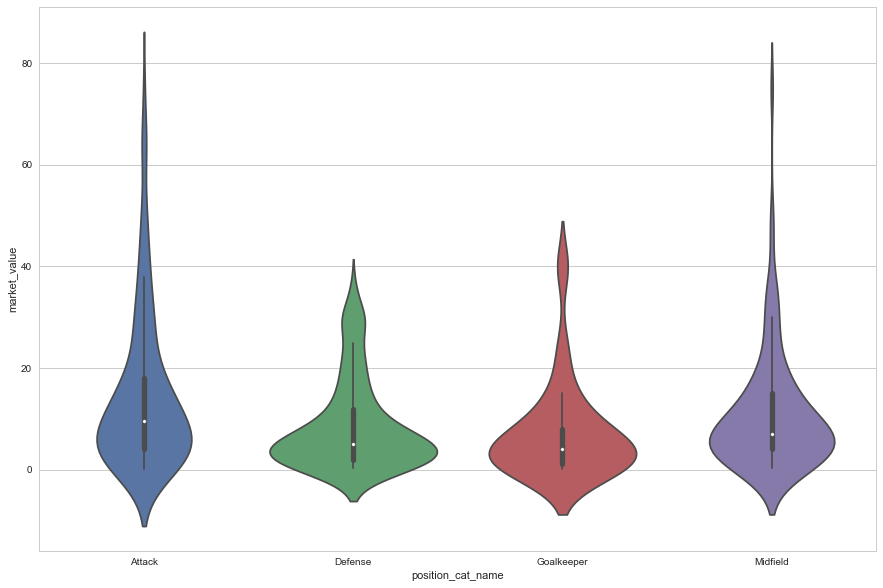

In [22]:
# Set figure size
plt.figure(figsize=(15,10))

ax = sns.violinplot(x="position_cat_name", y="market_value", data=df)

#### Horizontal Scatter Plot
https://seaborn.pydata.org/generated/seaborn.stripplot.html

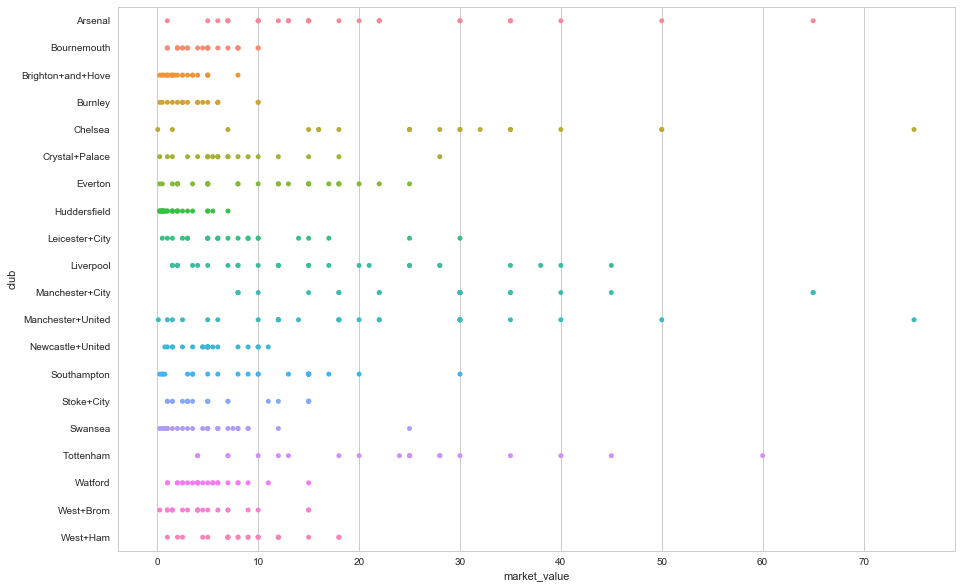

In [23]:
# Set figure size
plt.figure(figsize=(15,10))

ax = sns.stripplot(x="market_value", y="club", data=df) # use y="column" for horizontal plot

### Multivariate

#### Faceted Bar Charts
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

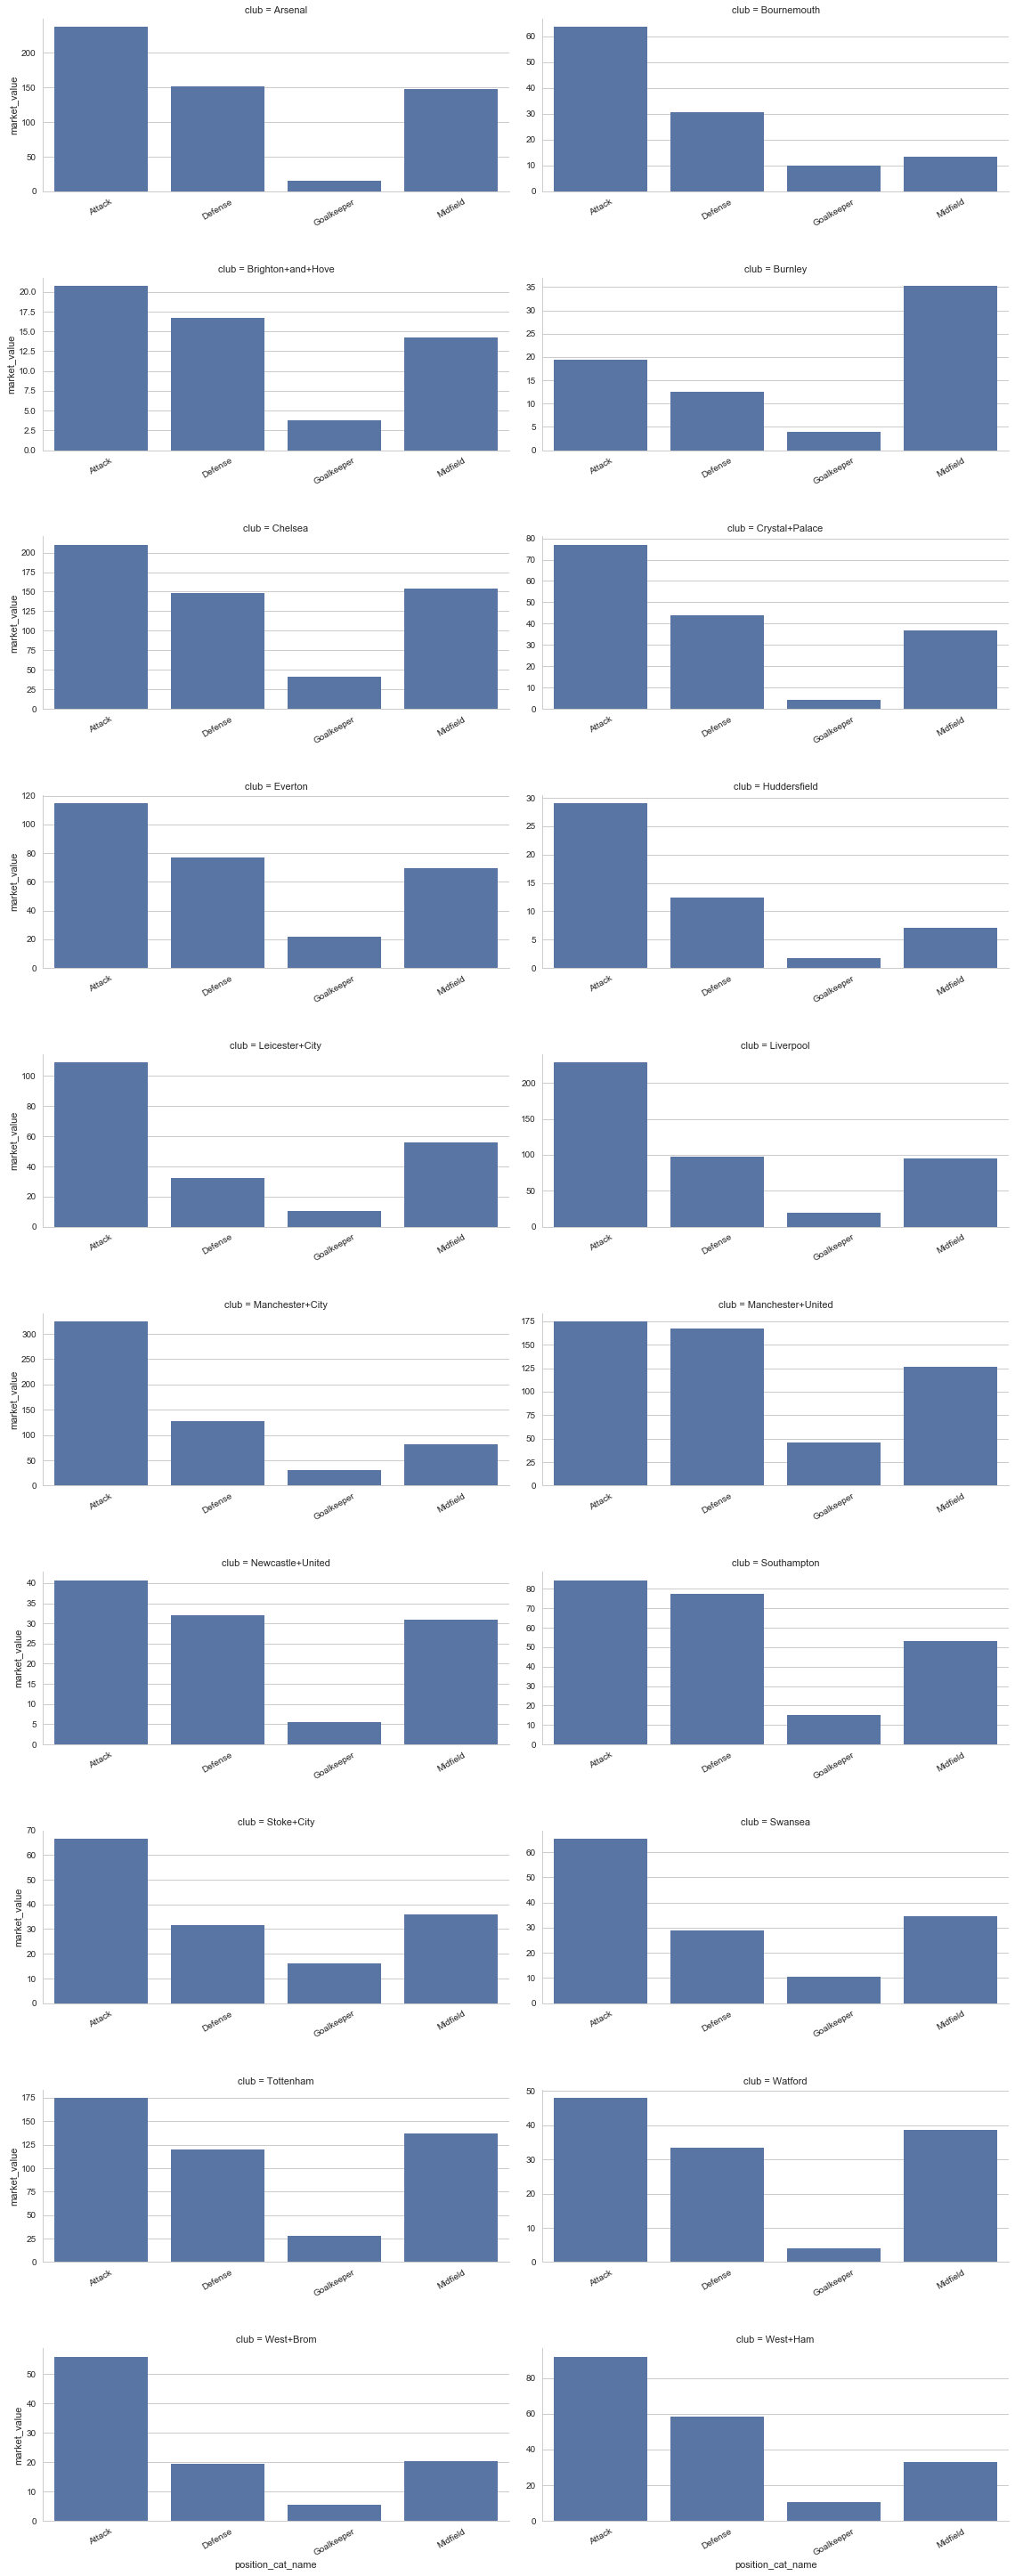

In [24]:
# # Plot the "Count" of the top 5 highest "Rank" for "Childs_First_Name" in year "2014" by "Ethnicity"
cols = ['position_cat_name', 'market_value', 'club']
facet_df = df.loc[: , cols]\
            .groupby(['club', 'position_cat_name'])\
            .agg({'market_value':sum})\
            .reset_index()

# # Names for x ticks
names = facet_df.position_cat_name.unique()

# # Create facet plots as bar charts
g = sns.FacetGrid(facet_df, col='club', col_wrap=2, size=4, aspect=2, sharey=False)
g.map(sns.barplot, 'position_cat_name', 'market_value', order=names)

# # Make x ticks available for each subplot
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=30)

# # Increase space between subplots
plt.subplots_adjust(hspace=0.5)

#### Mosaic Plot
http://www.statsmodels.org/stable/generated/statsmodels.graphics.mosaicplot.mosaic.html

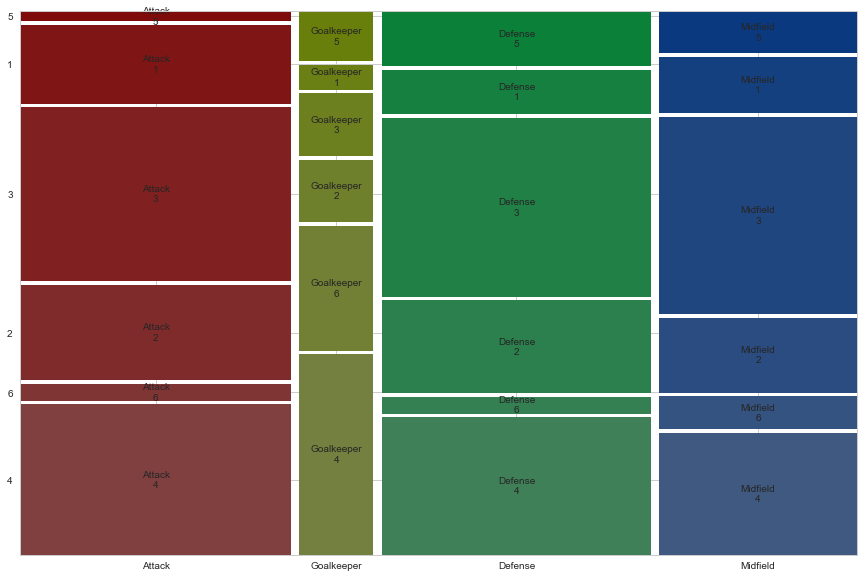

In [25]:
# Set figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Need an additional imports
from statsmodels.graphics.mosaicplot import mosaic

cols = ['position_cat_name', 'age_cat']
mosaic_df = df.loc[: , cols]
mosaic_df.loc[:, 'age_cat'] = mosaic_df.loc[:, 'age_cat'].astype('category')
_ = mosaic(mosaic_df, cols, ax=ax, gap=0.01)

#### Heat Map
https://seaborn.pydata.org/generated/seaborn.heatmap.html

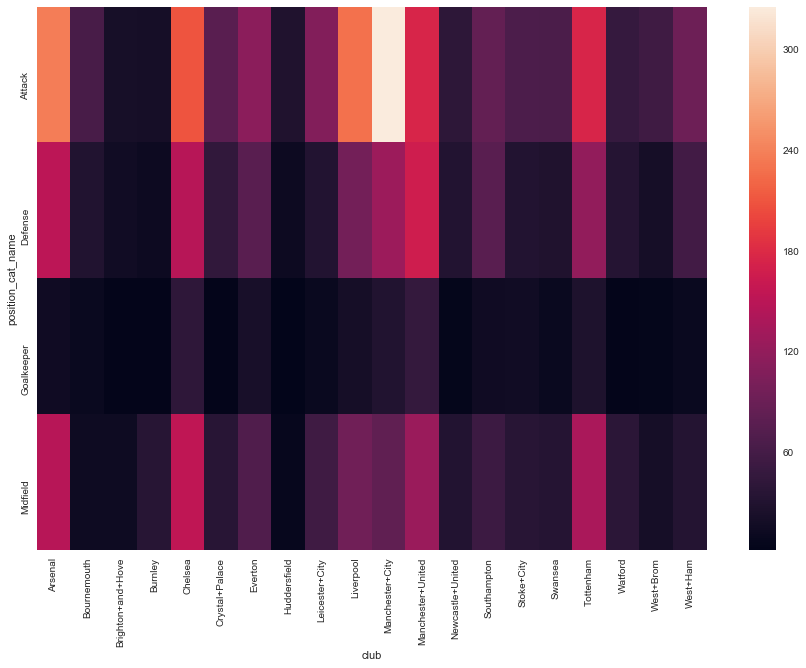

In [26]:
# Set figure size
plt.figure(figsize=(15,10))

# Get data columns we want to plot
cols = ['position_cat_name', 'club', 'market_value']
heatmap_df = df.loc[: , cols]\
            .groupby(['position_cat_name', 'club'])\
            .agg({'market_value':sum})\
            .reset_index()\
            .pivot('position_cat_name', 'club', 'market_value')

ax = sns.heatmap(heatmap_df)